In [1]:
import gzip
import os
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt

# ResNet20 on CIFAR10

In [2]:
bs_list = [64, 128, 256, 512, 1024]
color_dict = {64: 'blue', 128: 'green', 256: 'orange', 512: 'red', 1024: 'purple'}

In [3]:
dict_varpro = {}
dict_2ts = {}
dict_sgd = {}
dict_shampoo = {}

dir_path = ('./VarPro_resnet/results')

for bs in tqdm(bs_list):
    with gzip.open(os.path.join(dir_path, f'VarPro_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_varpro[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'2TS_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_2ts[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'SGD_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_sgd[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'Shampoo_lmbda-3.0_bs{bs}_ts-2.0.pkl.gz'), 'rb') as f:
        dict_shampoo[bs] = pickle.load(f)

100%|██████████| 5/5 [00:14<00:00,  2.94s/it]


## Comparing different batch sizes

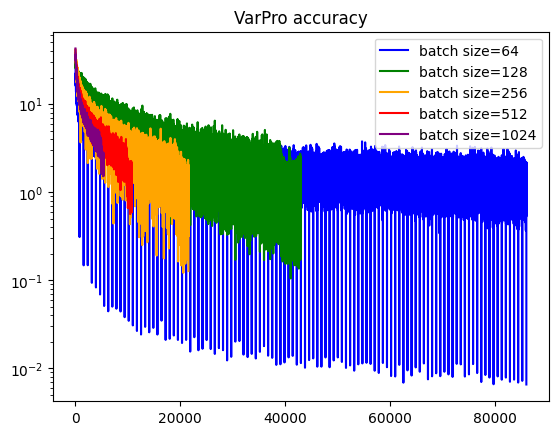

In [12]:
for bs in bs_list:
    plt.plot(dict_varpro[bs]['loss_list'], label=f'batch size={bs}', color=color_dict[bs])
plt.legend()
plt.title('VarPro accuracy')
plt.yscale('log')


Text(0.5, 1.0, 'SGD accuracy')

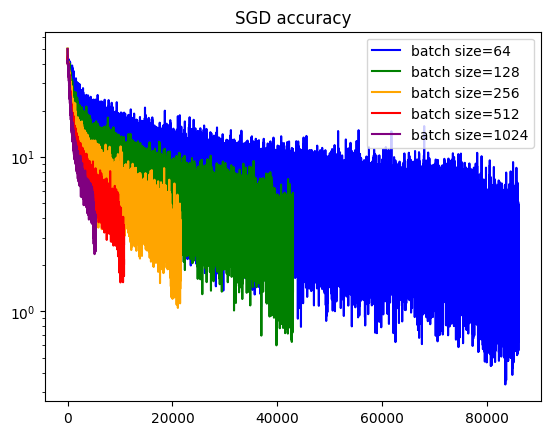

In [14]:
for bs in bs_list:
    plt.plot(dict_sgd[bs]['loss_list'], label=f'batch size={bs}', color=color_dict[bs])
plt.legend()
plt.yscale('log')
plt.title('SGD accuracy')


Text(0.5, 1.0, 'Shampoo accuracy')

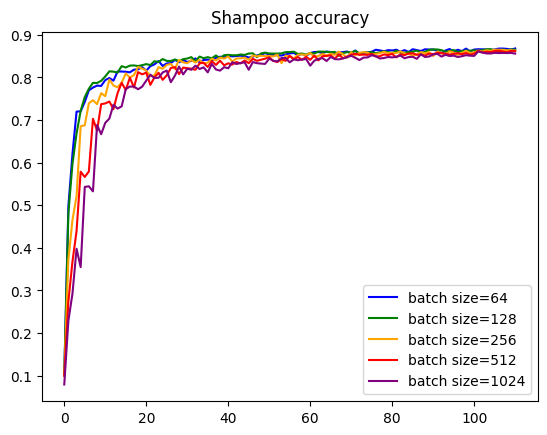

In [ ]:
for bs in bs_list:
    plt.plot(dict_shampoo[bs]['loss_list'], label=f'batch size={bs}', color=color_dict[bs])
plt.legend()
plt.yscale('log')
plt.title('Shampoo accuracy')

## Comparing different methods

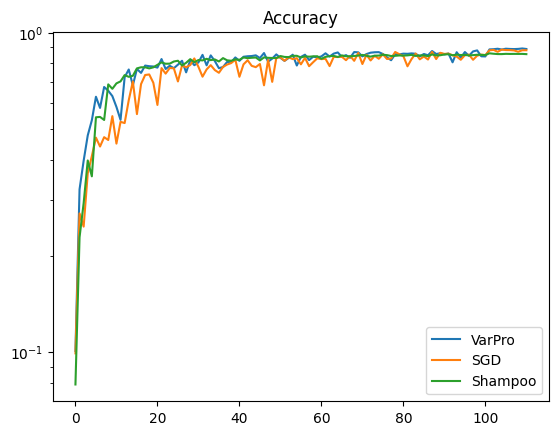

In [16]:
bs = 1024

plt.plot(dict_varpro[bs]['accuracy_list'], label=f'VarPro')
#plt.plot(dict_2ts[bs]['accuracy_list'], label=f'batch size={bs}', color=color_dict[bs])
plt.plot(dict_sgd[bs]['accuracy_list'], label=f'SGD')
plt.plot(dict_shampoo[bs]['accuracy_list'], label=f'Shampoo')
plt.legend()
plt.title('Accuracy')
plt.yscale('log')